In [2]:
import pandas as pd
import os
print(os.getcwd())
# Specify the file path to the dataset
# Specify the file path to the dataset
dataset_path = '../../data/final_database/auctions_main_updated.csv'
print(dataset_path)
# Read the dataset
data = pd.read_csv(dataset_path)

# Extract the year from the first four digits of the "Identifier" column
data['Year'] = data['identifier'].str[:4]

#or 

# Extract the year from the "Date" column
# data['Year'] = pd.to_datetime(data['date']).dt.year
# Count the number of auctions for each year
auctions_per_year = data['Year'].value_counts().sort_index()
# Print the results
print(auctions_per_year)

total_auctions =  auctions_per_year.sum()
# Print the total sum
print("Total auctions:", total_auctions)

/home/ga/Dropbox/00/CDS_Auction/src/exploration
../../data/final_database/auctions_main_updated.csv
2005     1
2006     4
2007     1
2008    16
2009    59
2010    16
2011    24
2012    16
2013    14
2014     6
2015     6
2016    10
2017    18
2018     6
2019    12
2020    19
2021     1
2022     3
2023     1
Name: Year, dtype: int64
Total auctions: 233


In [3]:
# Count the number of different dates for each year
unique_dates_per_year = data.groupby('Year')['date'].nunique()

# Print the results
print(unique_dates_per_year)


Year
2005     1
2006     4
2007     1
2008    10
2009    38
2010    12
2011    11
2012    14
2013     9
2014     3
2015     5
2016     7
2017    11
2018     5
2019    12
2020    19
2021     1
2022     3
2023     1
Name: date, dtype: int64


In [4]:
# Count the number of unique auction_name values for each year
unique_auction_names_per_year = data.groupby('Year')['auction_name'].nunique()

# Print the results
print(unique_auction_names_per_year)


Year
2005     1
2006     4
2007     1
2008    10
2009    45
2010    12
2011    11
2012    14
2013    10
2014     6
2015     5
2016     7
2017    11
2018     6
2019    12
2020    19
2021     1
2022     3
2023     1
Name: auction_name, dtype: int64


In [5]:
# Merge 'auction_name' and 'date' columns
data['Auction_Date'] = data['auction_name'] + ' - ' + data['date']

# Count the number of unique 'Auction_Date' values for each year
unique_auction_dates_per_year = data.groupby('Year')['Auction_Date'].nunique()

# Print the results
print(unique_auction_dates_per_year)


Year
2005     1
2006     4
2007     1
2008    10
2009    45
2010    12
2011    11
2012    14
2013    10
2014     6
2015     5
2016     7
2017    12
2018     6
2019    12
2020    19
2021     1
2022     3
2023     1
Name: Auction_Date, dtype: int64


In [6]:
# Count the number of auctions to buy and to sell
auctions_to_buy = data[data['noi_direction'] == -1].shape[0]
auctions_to_sell = data[data['noi_direction'] == 1].shape[0]

# Print the results
print("Number of auctions to buy:", auctions_to_buy)
print("Number of auctions to sell:", auctions_to_sell)


Number of auctions to buy: 72
Number of auctions to sell: 143


In [7]:
auctions_neither = data[~data['noi_direction'].isin([-1, 1])]
auctions_neither.shape[0]
#print("Number of auctions neither:", auctions_neither)


18

In [8]:
count_zero_noi = data[data['noi_absolute_value'] == 0].shape[0]
print("Number of rows with noi_absolute_value equal to 0:", count_zero_noi)


Number of rows with noi_absolute_value equal to 0: 18


In [9]:
auction_no_stage2 = data[(~data['noi_direction'].isin([-1, 1])) | (data['noi_absolute_value'] == 0)].shape[0]
print(auction_no_stage2)


24


In [10]:
# Filter the auctions that are neither to buy nor to sell
n_auctions_with_stage2 = data[(data['noi_direction'].isin([-1, 1])) & (data['noi_absolute_value'] != 0)].shape[0]
print("Number of auctions with stage 2: ", n_auctions_with_stage2)


Number of auctions with stage 2:  209


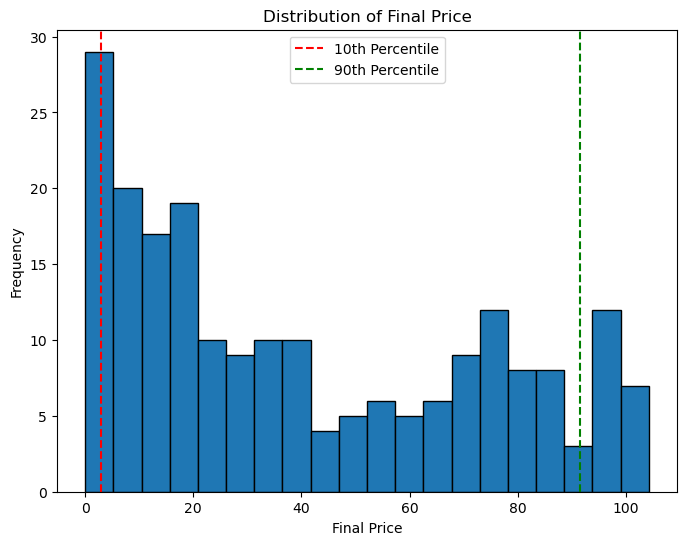

Descriptive Statistics for Final Price:
count    209.000000
mean      40.651483
std       32.644201
min        0.000000
25%       12.000000
50%       31.375000
75%       71.250000
max      104.250000
Name: final_price, dtype: float64
Percentile 10 for Final Price: 3.0
Percentile 90 for Final Price: 91.502


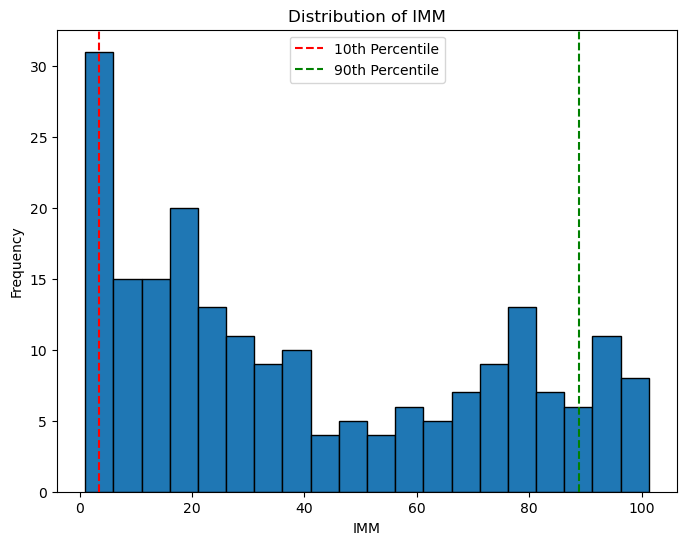


Descriptive Statistics for IMM:
count    209.000000
mean      40.832416
std       31.880718
min        1.000000
25%       12.750000
50%       30.375000
75%       73.000000
max      101.250000
Name: IMM, dtype: float64
Percentile 10 for IMM: 3.5
Percentile 90 for IMM: 88.9


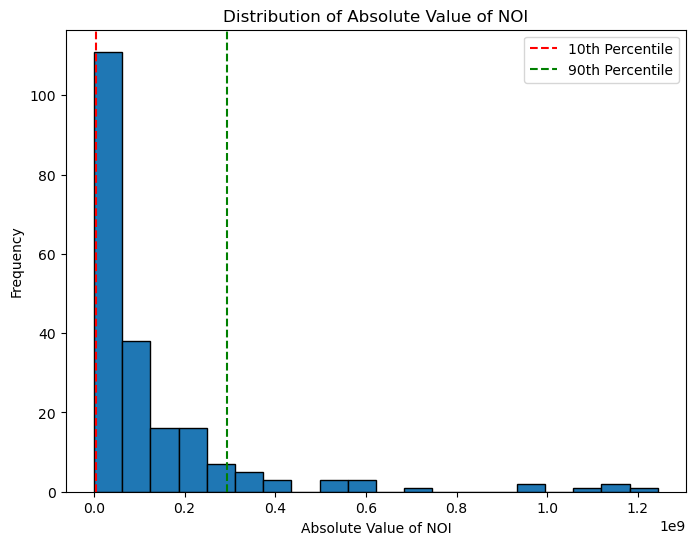

Descriptive Statistics for Absolute Value of NOI:
count    2.090000e+02
mean     1.292468e+08
std      2.116114e+08
min      1.839371e+05
25%      1.654160e+07
50%      5.397096e+07
75%      1.374917e+08
max      1.243798e+09
Name: noi_usd, dtype: float64
Percentile 10 for Absolute Value of NOI: 5430000.0
Percentile 90 for Absolute Value of NOI: 293280000.0000001


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Compute descriptive statistics for final price
auctions_with_stage2 = data[(data['noi_direction'].isin([-1, 1])) & (data['noi_usd'] != 0)]
descriptive_stats_final_price = auctions_with_stage2['final_price'].describe()

# Compute descriptive statistics for IMM
descriptive_stats_imm = auctions_with_stage2['IMM'].describe()

# Compute 10th and 90th percentiles separately for final price
percentile_10_final_price = np.percentile(auctions_with_stage2['final_price'], 10)
percentile_90_final_price = np.percentile(auctions_with_stage2['final_price'], 90)

# Compute 10th and 90th percentiles separately for IMM
percentile_10_imm = np.percentile(auctions_with_stage2['IMM'], 10)
percentile_90_imm = np.percentile(auctions_with_stage2['IMM'], 90)

# Compute descriptive statistics for absolute value of NOI
descriptive_stats_noi_absolute_value = auctions_with_stage2['noi_usd'].describe()

# Compute 10th and 90th percentiles separately for absolute value of NOI
percentile_10_noi_absolute_value = np.percentile(auctions_with_stage2['noi_absolute_value'], 10)
percentile_90_noi_absolute_value = np.percentile(auctions_with_stage2['noi_absolute_value'], 90)

# Plot the distribution of final price
plt.figure(figsize=(8, 6))
plt.hist(auctions_with_stage2['final_price'], bins=20, edgecolor='black')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.title('Distribution of Final Price')
plt.axvline(percentile_10_final_price, color='r', linestyle='--', label='10th Percentile')
plt.axvline(percentile_90_final_price, color='g', linestyle='--', label='90th Percentile')
plt.legend()
plt.show()

# Print the descriptive statistics for final price
print("Descriptive Statistics for Final Price:")
print(descriptive_stats_final_price)
print("Percentile 10 for Final Price:", percentile_10_final_price)
print("Percentile 90 for Final Price:", percentile_90_final_price)

# Plot the distribution of IMM
plt.figure(figsize=(8, 6))
plt.hist(auctions_with_stage2['IMM'], bins=20, edgecolor='black')
plt.xlabel('IMM')
plt.ylabel('Frequency')
plt.title('Distribution of IMM')
plt.axvline(percentile_10_imm, color='r', linestyle='--', label='10th Percentile')
plt.axvline(percentile_90_imm, color='g', linestyle='--', label='90th Percentile')
plt.legend()
plt.show()


# Print the descriptive statistics for IMM
print("\nDescriptive Statistics for IMM:")
print(descriptive_stats_imm)
print("Percentile 10 for IMM:", percentile_10_imm)
print("Percentile 90 for IMM:", percentile_90_imm)



# Plot the distribution of absolute value of NOI
plt.figure(figsize=(8, 6))
plt.hist(auctions_with_stage2['noi_usd'], bins=20, edgecolor='black')
plt.xlabel('Absolute Value of NOI')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Value of NOI')
plt.axvline(percentile_10_noi_absolute_value, color='r', linestyle='--', label='10th Percentile')
plt.axvline(percentile_90_noi_absolute_value, color='g', linestyle='--', label='90th Percentile')
plt.legend()
plt.show()

# Print the descriptive statistics for absolute value of NOI
print("Descriptive Statistics for Absolute Value of NOI:")
print(descriptive_stats_noi_absolute_value)
print("Percentile 10 for Absolute Value of NOI:", percentile_10_noi_absolute_value)
print("Percentile 90 for Absolute Value of NOI:", percentile_90_noi_absolute_value)



In [12]:
top_10_rows = auctions_with_stage2.nlargest(10, 'noi_usd')
top_10_rows_sorted = top_10_rows.sort_values('noi_usd', ascending=False)
print(top_10_rows_sorted[['identifier', 'auction_name', 'noi_usd', 'currency', 'exchange_rate', 'currencies_exchange']])


                                    identifier                auction_name  \
18                      20081106_kaupth_Senior              Kaupthing Bank   
48                         20090423_idearc_CDS                      Idearc   
56                         20090610_jscbta_CDS                JSC BTA Bank   
77                         20091120_citgrp_CDS                         CIT   
13                         20081023_washmu_CDS           Washington Mutual   
22                         20090106_tribco_CDS                     Tribune   
58                         20090612_genmtr_CDS              General Motors   
230                        20220912_RUSSIA_CDS                Russian Fedn   
9    20081006_famefrmc_Fannie-Mae-Subordinated  Fannie Mae and Freddie Mac   
14                      20081104_landsb_Senior                  Landsbanki   

          noi_usd currency  exchange_rate currencies_exchange  
18   1.243798e+09      EUR       0.783085             USD/EUR  
48   1.173859

In [13]:
bottom_10_rows = auctions_with_stage2.nsmallest(10, 'noi_usd')
bottom_10_rows_sorted = bottom_10_rows.sort_values('noi_usd', ascending=True)
print(bottom_10_rows_sorted[['identifier', 'auction_name', 'noi_usd', 'currency', 'exchange_rate', 'currencies_exchange']])


                           identifier  \
83                 20100325_aiful_CDS   
150               20131204_OGXPET_CDS   
155             20140819_SOLOGRO_LCDS   
131  20120502_ELCDS-Eircom_LCDS-LIEN2   
164              20160406_PACIEXP_CDS   
23               20090106_tribco_LCDS   
141                20130424_DXMI_LCDS   
142                20130424_SPMD_LCDS   
29           20090205_sanitc_1st-Lien   
138            20130131_PJHOLDCO_LCDS   

                                          auction_name       noi_usd currency  \
83                                               Aiful  1.839371e+05      JPY   
150                OGX PETROLEO E GAS PARTICIPACOES SA  2.703000e+05      USD   
155  Solocal Group S.A. (formerly known as PagesJau...  6.677000e+05      EUR   
131                                             Eircom  1.313100e+06      EUR   
164                           PACIFIC EXPL PRODTN CORP  1.339839e+06      USD   
23                                             Tribune  2.5540

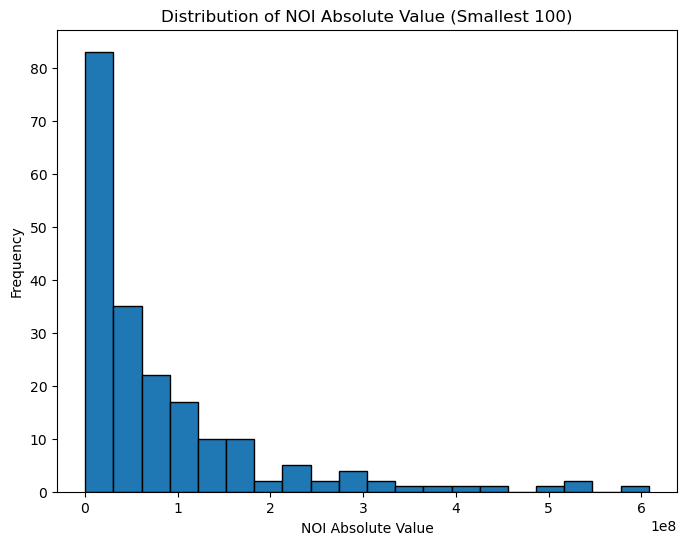

In [14]:
smallest_100_rows = auctions_with_stage2.nsmallest(200, 'noi_absolute_value')

plt.figure(figsize=(8, 6))
plt.hist(smallest_100_rows['noi_absolute_value'], bins=20, edgecolor='black')
plt.xlabel('NOI Absolute Value')
plt.ylabel('Frequency')
plt.title('Distribution of NOI Absolute Value (Smallest 100)')
plt.show()


In [15]:
missing_values = auctions_with_stage2['IMM'].isnull().sum()
print("Missing values in IMM column:", missing_values)


Missing values in IMM column: 0


In [49]:
nan_rows = data[data['IMM'].isnull()]
print(nan_rows)


                      identifier                                auction_name  \
195  20181127_NOVOBAN_CDS-Senior  NOVO BCO SA (senior SRO transactions only)   
205    20190911_TOGUN_CDS-Senior                 TOP GUN REALISATIONS 61 LTD   
216          20200604_INTINV_CDS                           Intelsat Invts SA   

                  date   ticker   box_title  multiple_final_prices  \
195   27 November 2018  NOVOBAN  CDS-Senior                  False   
205  11 September 2019    TOGUN  CDS-Senior                  False   
216       04 June 2020   INTINV         CDS                  False   

     final_price  IMM                   NOI  noi_absolute_value  \
195        89.96  NaN                   NaN                 NaN   
205       100.00  NaN  EUR 0 million to buy                 0.0   
216       100.00  NaN  USD 0 million to buy                 0.0   

     noi_direction currency  exchange_rate currencies_exchange  noi_usd  Year  \
195            NaN      EUR       0.882768      

In [54]:
# Count the number of rows containing "LCDS" or "lien" in the "box_title" column
LCDS_count = data['box_title'].str.contains('LCDS|lien', case=False).sum()

# Print the count
print(LCDS_count)


45


### Physical Settlement Requests and IMM

In [61]:
## import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
from matplotlib.lines import Line2D


## set up the directories
path = os.getcwd()
path = os.path.join(path, "Results")
path_psr_fig =  os.path.join(path, "PSR")
if not os.path.exists(path_psr_fig):
    os.makedirs(path_psr_fig)

csv_files = glob.glob(os.path.join(path, "*.csv"))
csv_files = [file for file in csv_files if "Limit Orders" not in file]

## create colors for plots
cmap = cm.get_cmap('Set1')
n_colors = 15
csv_files.sort(key=lambda x: int(os.path.basename(x)[:4]))

legend_elements = [Line2D([0], [0], marker='s', color='w', label='Offer',
                          markerfacecolor='gray', markersize=11),
                          Line2D([0], [0], marker='o', color='w', label='Bid',
                          markerfacecolor='gray', markersize=11)]
counter = 0
for file in csv_files:
    try:
        if "Dealer,Bid,Offer" in open(file).read():
            df = pd.read_csv(file)
            dealers = df['Dealer'].unique()
            colors = [cmap(i) for i in range(len(dealers))]
            shapes = ['o', 's']
            plt.figure(figsize=(10, 12))
            filename = os.path.basename(file)
            name, ext = os.path.splitext(filename)  # Split the file name into name and extension parts and assign them to the variables name and ext respectively
            plt.suptitle(name) # Set the title of the figure as the name of the file
            for i, dealer in enumerate(dealers):
                group = df[df['Dealer'] == dealer]
                x = [i for _ in range(len(group))]
                y = group['Bid'].values
                plt.scatter(x, y,color=cmap(i/n_colors), marker=shapes[0], label='Bid')
                y = group['Offer'].values
                plt.scatter(x, y, color=cmap(i/n_colors), marker=shapes[1], label = 'Offer')
            average_bid = df['Bid'].mean()
            average_offer = df['Offer'].mean()
            average_all = (df['Bid'].mean() + df['Offer'].mean())/2
            plt.axhline(average_bid, color='darkgrey', linestyle='dashed', label='Avg Bid')
            plt.axhline(average_offer, color='grey', linestyle='dashed', label='Avg Offer')
            plt.axhline(average_all, color='darkgrey', linestyle='dashed', label='Avg All')
            df['Dealer_short'] = df['Dealer'].str.slice(stop=15)
            plt.xticks(range(len(dealers)), df['Dealer_short'], rotation=90)
            plt.legend(handles=legend_elements)
            
            # Order the bids and offers in decreasing and increasing order respectively:
            df_bid_asc = df.sort_values(by=['Bid'], ascending=False)
            df_off_desc = df.sort_values(by=['Offer'], ascending=True)

            # Compare the bids and offers, and store the remaining bids and offers in the variables defined in step 2:
            # Order the bids and offers in decreasing and increasing order respectively:
            df_bid_asc = df.sort_values(by=['Bid'], ascending=False)
            df_off_desc = df.sort_values(by=['Offer'], ascending=True)

            i,j = 0,0
            while i < len(df_bid_asc) and j < len(df_off_desc):
                if df_bid_asc.iloc[i]['Bid'] >= df_off_desc.iloc[j]['Offer']:
                    df_bid_asc = df_bid_asc.drop(df_bid_asc.index[i])
                    df_off_desc = df_off_desc.drop(df_off_desc.index[j])
                else:
                    i+=1
                    j+=1

            n = len(df_bid_asc)
            if n == 0:
                IMM = None
            else:
                IMM = (df_off_desc['Offer'].mean() + df_bid_asc['Bid'].mean())/2
            print(IMM)
            IMM = round(IMM * 8) / 8

            print("IMM: ",IMM)

            plt.axhline(IMM, color='red', linestyle='solid', label='IMM')
            plt.legend(handles=legend_elements+[Line2D([0], [0], color='red', label='IMM', linestyle='solid')])
            # Saving the figure and displying it 
            
            plt.savefig(os.path.join(path_psr_fig, name + "_p.png"), format='png') # The code is saving the figure in the path specified by the path_lo_fig variable and appending the name of the file with 'Offer.png' and format is set to png
            plt.show()  # The code is showing the plot
            plt.clf()   # The code is clearing the current figure to free up memory
        
    except Exception as e:
        print(f'An error occurred while processing {file} : {e}')
        with open('error_log.txt', 'a') as f:
            f.write(f'An error occurred while processing {file} : {e}\n')
        #counter += 1
        #if counter > 40:
        #    break
    continue
    

### Physical Settlement Requests and NOI

In [ ]:
## import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
from matplotlib.lines import Line2D


## set up the directories
path = os.getcwd()
path = os.path.join(path, "Results")
path_psr_fig =  os.path.join(path, "PSR")
if not os.path.exists(path_psr_fig):
    os.makedirs(path_psr_fig)

csv_files = glob.glob(os.path.join(path, "*.csv"))
csv_files = [file for file in csv_files if "Limit Orders" not in file]

## create colors for plots
cmap = cm.get_cmap('Set1')
n_colors = 15
csv_files.sort(key=lambda x: int(os.path.basename(x)[:4]))


def size_signed(row):
    if row["Bid/Offer"] == "Bid":
        return -1 * row["Size"]
    else:
        return row["Size"]



for file in csv_files:
        if "Dealer,Bid/Offer,Size" in open(file).read() or "Bidder,Bid / Offer," in open(file).read():
            print(file)
            df = pd.read_csv(file)
            df = df.rename(columns={"Bid / Offer": "Bid/Offer", "Size / $ m": "Size", "Size / $m": "Size", "Bidder": "Dealer" })

            df["Size_signed"] = df.apply(size_signed, axis=1)
            NOI = sum(df["Size_signed"])
            print("NOI is " + str(NOI))

            filename = os.path.basename(file)
            name, ext = os.path.splitext(filename)  # Split the file name into name and extension parts and assign them to the variables name and ext respectively
            plt.figure()
            plt.suptitle(name) # Set the title of the figure as the name of the file

            plt.scatter(df[df["Size_signed"] > 0]['Size_signed'], df[df["Size_signed"] > 0]['Dealer'], marker='s')
            plt.scatter(df[df["Size_signed"] < 0]['Size_signed'], df[df["Size_signed"] < 0]['Dealer'], marker='o')
            plt.scatter(df[df["Size_signed"] == 0]['Size_signed'], df[df["Size_signed"] == 0]['Dealer'], marker='x')    
            plt.axvline(x=0,  linestyle='--', color= "darkgrey")

            plt.xlabel("Size signed")
            plt.ylabel("Dealer")
            
            plt.savefig(os.path.join(path_psr_fig, name + "_Q.png"), format='png') # The code is saving the figure in the path specified by the path_lo_fig variable and appending the name of the file with 'Offer.png' and format is set to png
            plt.show()  # The code is showing the plot
            plt.clf()   # The code is clearing the current figure to free up memory
            
            #print(df)


### Limit Orders when NOI to Buy


In [ ]:
## import necessary libraries

import pandas as pd #  used for data manipulation and analysis.
import matplotlib.pyplot as plt  # used for creating plots
import matplotlib.colors as mcolors # used for creating a color map for the dots
import os # used for interacting with the operating system, such as creating directories
import glob # used for finding all the csv files in a directory
import matplotlib.cm as cm
import re # used for regular expressions

## set up the directories

path = os.getcwd() # gets the current working directory and assigns it to the variable path.
path = os.path.join(path, "Results") #concatenates the path variable with the string "Results" and assigns it to the variable path.
path_lo_fig =  os.path.join(path, "Limit-Orders-Graphs")
#checks if the directory specified by path_lo_fig exists, and if it does not, it creates the directory using os.makedirs(path_lo_fig).
if not os.path.exists(path_lo_fig):
    os.makedirs(path_lo_fig)
# find all the csv files in the directory specified by path whose names contain the string "Limit Orders". 
csv_files = glob.glob(os.path.join(path, "*Limit Orders*.csv"))

## create colors for plots
# Create a color map for the dots
cmap = cm.get_cmap('Set1')
# Set the number of colors you want
n_colors = 15
# sort the files by the first four characters of their filename
csv_files.sort(key=lambda x: int(os.path.basename(x)[:4]))

## create a set of unique dealers for all the auctions
unique_dealers = set() # Create an empty set

## Create Limit Order Plots: left side by dealer and right side aggregate
for file in csv_files:
    try: #to handle errors
        if "Offer" in open(file).read(): # Open the file and check if the string "Offer" is present in the file's contents. If it is, the code continues to execute.
            print(file)
            df = pd.read_csv(file) # Read the csv file and assign it to a dataframe called df.
            df['Offer'] = df['Offer'].astype(str)
            df['Offer'] = df['Offer'].replace(to_replace='#', value='', regex=True) # Replacing the '#' character with nothing in the 'Offer' column.
            df['Dealer'] = df['Dealer'].str.replace('*','') # Replacing the '*' character with nothing in the 'Dealer' column
            df.columns = df.columns.str.replace(r'\*|\*\*', '') # Replacing the '*' and '**' characters with nothing in the column names.
            df= df.dropna()
            df = df.reset_index(drop=True)

            df['Filled'] = 0
            df.loc[df['Offer'].str.contains('\^'), 'Filled'] = 1
            df.loc[df['Offer'].str.contains('\*') & (df['Filled'] == 0), 'Filled'] = 1

            df['Part_Filled'] = 0
            df.loc[df['Offer'].str.contains('\^'), 'Part_Filled'] = 1

            df['Offer'] = df['Offer'].replace(to_replace='\^', value='', regex=True) # Replacing the '^' character with nothing in the 'Offer' column.
            df = df.replace(regex=r'\*|\*\*', value='') # Replacing the '*' and '**' characters with nothing in all columns of the dataframe.
            df['Offer'] = pd.to_numeric(df['Offer']) # Convert the 'Offer' column in df to a numeric data type.
            
            df_agg = df.groupby(['Dealer', 'Offer', 'Filled'])['Size'].sum().reset_index() # Create a new dataframe called df_agg that groups by 'Dealer', 'Offer', and 'Filled' columns and sums the 'Size' column.
            df_agg['CumulativeSize'] = df_agg.groupby(['Dealer'])['Size'].cumsum() # Add a new column 'CumulativeSize' to df_agg that is the cumulative sum of the 'Size' column grouped by 'Dealer'

            final_price = df_agg[df_agg['Filled'] == 1]['Offer'].max() # Getting the final price of the auction by finding the minimum value in the 'Offer' column of the df_agg dataframe.
            print("Final price is " + str(final_price))
            dealers = df_agg.Dealer.unique() # Create a list of unique dealers
            unique_dealers.update(dealers) # Add the unique values to the set

            # Create a figure with 2 subplots, one for the dealer plots and one for the aggregate supply
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
            filename = os.path.basename(file)
            name, ext = os.path.splitext(filename)  # Split the file name into name and extension parts and assign them to the variables name and ext respectively
            fig.suptitle(name) # Set the title of the figure as the name of the file

            # Compute Cumulative Size and NOI
            df = df.sort_values(by='Offer', ascending=True) # Sort the dataframe by 'Offer' in ascending order
            df['CumulativeSize'] = df['Size'].cumsum() # Add a new column 'CumulativeSize' to df_supply that is the cumulative sum of the 'Size' column
            df = df.reset_index(drop=True)
            #print(df)
            if df['Part_Filled'].sum() == 0:
                NOI= df[df['Offer'] == final_price]['CumulativeSize'].max()
                ax2.axvline(x=NOI, color='orange', linestyle='--', label ='NOI')
            else: 
                if df.loc[0,'Part_Filled'] == 1:
                    NOI = df.loc[df['Part_Filled'] == 1, 'CumulativeSize'].max()
                    ax2.axvline(x=NOI, color='orange', linestyle='--', label ='NOI')
                else:
                    max_NOI = df[df['Offer'] == final_price]['CumulativeSize'].max()
                    min_NOI = df.loc[df[df['Part_Filled'] == 1].index[0]-1, 'CumulativeSize']
                    NOI= "Range of Values more than " + str(min_NOI) + " and less than " + str(max_NOI)
                    ax2.axvspan(min_NOI, max_NOI, color='orange', alpha=0.5, label = 'Range of possible NOI')
            print("NOI is " + str(NOI))

            # Plot dealer's supply data on the left axes
            for i, dealer in enumerate(dealers):
                temp_df = df[df['Dealer'] == dealer] # Create a new dataframe called temp_df that contains only the rows from df_agg that have the current dealer
                temp_df_agg = df_agg[df_agg['Dealer'] == dealer] # Create a new dataframe called temp_df that contains only the rows from df_agg that have the current dealer
                temp_df_agg = temp_df_agg.sort_values(by='Offer') # Sort the dataframe by 'Offer' in ascending order
                if len(temp_df_agg) < 2:  # If the number of rows in temp_df is less than 2, then it will plot the data as scatter plot
                    ax1.scatter(temp_df_agg['CumulativeSize'], temp_df_agg['Offer'], color=cmap(i/n_colors), label = dealer)
                else:  # If the number of rows in temp_df is more than 2, then it will plot the data as line plot
                    ax1.plot(temp_df_agg['CumulativeSize'], temp_df_agg['Offer'], color=cmap(i/n_colors), label = dealer)
                ax2.scatter(temp_df['CumulativeSize'], temp_df['Offer'], color=cmap(i/n_colors), label = dealer)  # Plot the aggregate supply data on the right axes
            if df['Filled'].sum() == 0:
                ax1.set_title("No second stage Auction")
            else:
                ax1.set_title("Individual Limit Orders")
                ax1.axhline(final_price, color='darkgrey', linestyle='--', label="Final Price") # Plot a horizontal line at the final price
            ax1.set_xlabel('Cumulative Size') # Set the x-axis label as 'Cumulative Size'
            ax1.set_ylabel('Offer') # Set the y-axis label as 'Offer'
            ax1.legend(loc = 'best', fontsize=7)  # Create a legend and set the location as 'best' and font size as 7
            
            ax2.set_title("Agrgregate Supply")
            ax2.plot(df['CumulativeSize'], df['Offer'], color = 'grey')  # Plot the aggregate supply data on the right axes
            ax2.set_xlabel('Cumulative Size') # Set the x-axis label as 'Cumulative Size'
            ax2.axhline(final_price, color='darkgrey', linestyle='--', label="Final Price")
            ax2.set_ylabel('Offer')  # Set the y-axis label as 'Offer'
            ax2.legend(loc = 'best', fontsize=7) # Create a legend and set the location as 'best' and font size as 7
           
            # Saving the figure and displying it 
            plt.savefig(os.path.join(path_lo_fig, name + "Offer.png"), format='png') # The code is saving the figure in the path specified by the path_lo_fig variable and appending the name of the file with 'Offer.png' and format is set to png
            plt.show()  # The code is showing the plot
            plt.clf()   # The code is clearing the current figure to free up memory
    # Handling exceptions        
    except Exception as e:
        print(f'An error occurred while processing {file} at iteration {i} : {e}')
        with open('error_log.txt', 'a') as f:
            f.write(f'An error occurred while processing {file} at iteration {i} : {e}\n')
    continue # Handling any exceptions that may occur during the processing of the file by printing an error message and writing the error message to an 'error_log.txt' file. The continue statement is used to skip the current iteration and proceed to the next iteration.

print(unique_dealers)

In [ ]:
from sqlalchemy import create_engine, Column, String, PrimaryKeyConstraint
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base

# create an engine to connect to the database
engine = create_engine('sqlite:///mydatabase.db')

# create a session factory
Session = sessionmaker(bind=engine)

# create a base class for declarative models
Base = declarative_base()

# define the Dealer model
class Dealer(Base):
    __tablename__ = 'dealers'
    name = Column(String, primary_key=True)

# create the dealers table
Base.metadata.create_all(engine)

# start a session
session = Session


# Create a session factory
Session = sessionmaker(bind=engine)

# Create a new session
session = Session()

# Insert the unique dealer names into the table
session.bulk_save_objects([Dealer(name=name) for name in unique_dealers])

# Commit the changes
session.commit()




In [ ]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

# Connect to the database
engine = create_engine('sqlite:///mydatabase.db')

# Create a session factory
Session = sessionmaker(bind=engine)

# Create a new session
session = Session()

# Query the data in the dealers table
dealers = session.query(Dealer).all()

# Print the name of each dealer
for dealer in dealers:
    print(dealer.name)


In [ ]:
from sqlalchemy import and_

# start a session
session = Session()

# query the dealers table to get all the rows where the name column contains the string 'Golman'
dealers = session.query(Dealer).filter(Dealer.name.like('%Barclays%')).all()

# loop through the results and print out the name of each dealer
for dealer in dealers:
    print(dealer.name)

# close the session
session.close()

### Limit  orders when NOI to sell

In [ ]:
## import necessary libraries

import pandas as pd #  used for data manipulation and analysis.
import matplotlib.pyplot as plt  # used for creating plots
import matplotlib.colors as mcolors # used for creating a color map for the dots
import os # used for interacting with the operating system, such as creating directories
import glob # used for finding all the csv files in a directory
import matplotlib.cm as cm
import re # used for regular expressions

## set up the directories

path = os.getcwd() # gets the current working directory and assigns it to the variable path.
path = os.path.join(path, "Results") #concatenates the path variable with the string "Results" and assigns it to the variable path.
path_lo_fig =  os.path.join(path, "Limit-Orders-Graphs")
#checks if the directory specified by path_lo_fig exists, and if it does not, it creates the directory using os.makedirs(path_lo_fig).
if not os.path.exists(path_lo_fig):
    os.makedirs(path_lo_fig)
# find all the csv files in the directory specified by path whose names contain the string "Limit Orders". 
csv_files = glob.glob(os.path.join(path, "*Limit Orders*.csv"))

## create colors for plots
# Create a color map for the dots
cmap = cm.get_cmap('hsv')
# Set the number of colors you want
n_colors = 15
# sort the files by the first four characters of their filename
csv_files.sort(key=lambda x: int(os.path.basename(x)[:4]))

## Create Auction to Sell Plots: left side by dealer and right side aggregate
for file in csv_files:
    try:
        if "Bid" in open(file).read():
            print(file)
            df = pd.read_csv(file)
            df['Bid'] = df['Bid'].astype(str)
            df['Bid'] = df['Bid'].replace(to_replace='#', value='', regex=True)
            df['Dealer'] = df['Dealer'].str.replace('*','')
            df.columns = df.columns.str.replace(r'\*|\*\*', '')
            df= df.dropna()
            df = df.reset_index(drop=True)

            df['Filled'] = 0
            df.loc[df['Bid'].str.contains('\^'), 'Filled'] = 1
            df.loc[df['Bid'].str.contains('\*') & (df['Filled'] == 0), 'Filled'] = 1
            
            df['Part_Filled'] = 0
            df.loc[df['Bid'].str.contains('\^'), 'Part_Filled'] = 1
            
            df['Bid'] = df['Bid'].replace(to_replace='\^', value='', regex=True)
            df = df.replace(regex=r'\*|\*\*', value='')
            df['Bid'] = pd.to_numeric(df['Bid'])
            
            df_agg = df.groupby(['Dealer', 'Bid', 'Filled'])['Size'].sum().reset_index()
            df_agg = df_agg.sort_values(by='Bid', ascending=False)
            df_agg['CumulativeSize'] = df_agg.groupby(['Dealer'])['Size'].cumsum()

            final_price = df_agg[df_agg['Filled'] == 1]['Bid'].min()# Getting the final price of the auction by finding the msximum value in the 'Bid' column of the df_agg dataframe.
            print(final_price)
            dealers = df_agg.Dealer.unique() # Create a list of unique dealers
            # Create a figure with 2 subplots, one for the dealer plots and one for the aggregate demand
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
            filename = os.path.basename(file)
            name, ext = os.path.splitext(filename)  # Split the file name into name and extension parts and assign them to the variables name and ext respectively
            fig.suptitle(name) # Set the title of the figure as the name of the file
            
            # Compute Cumulative Size and NOI
            df = df.sort_values(by='Bid', ascending=False) # Sort the dataframe by 'Offer' in ascending order
            df['CumulativeSize'] = df['Size'].cumsum() # Add a new column 'CumulativeSize' to df_supply that is the cumulative sum of the 'Size' column
            df = df.reset_index(drop=True)
            #print(df)
            if df['Part_Filled'].sum() == 0:
                NOI= df[df['Bid'] == final_price]['CumulativeSize'].max()
                ax2.axvline(x=NOI, color='orange', linestyle='--', label ='NOI')
            else: 
                if df.loc[0,'Part_Filled'] == 1:
                    NOI = df.loc[df['Part_Filled'] == 1, 'CumulativeSize'].max()
                    ax2.axvline(x=NOI, color='orange', linestyle='--', label ='NOI')
                else:
                    max_NOI = df[df['Bid'] == final_price]['CumulativeSize'].max()
                    min_NOI = df.loc[df[df['Part_Filled'] == 1].index[0]-1, 'CumulativeSize']
                    NOI= "Range of Values more than " + str(min_NOI) + " and less than " + str(max_NOI)
                    ax2.axvspan(min_NOI, max_NOI, color='orange', alpha=0.5, label = 'Range of possible NOI')
            print("NOI is " + str(NOI))

            # Plot dealer's demand data on the left axes
            for i, dealer in enumerate(dealers):
                temp_df = df[df['Dealer'] == dealer] # Create a new dataframe called temp_df that contains only the rows from df_agg that have the current dealer
                temp_df_agg = df_agg[df_agg['Dealer'] == dealer] # Create a new dataframe called temp_df that contains only the rows from df_agg that have the current dealer
                temp_df_agg = temp_df_agg.sort_values(by='Bid') # Sort the dataframe by 'Offer' in ascending order
                if len(temp_df_agg) < 2:  # If the number of rows in temp_df is less than 2, then it will plot the data as scatter plot
                    ax1.scatter(temp_df_agg['CumulativeSize'], temp_df_agg['Bid'], color=cmap(i/n_colors), label = dealer)
                else:  # If the number of rows in temp_df is more than 2, then it will plot the data as line plot
                    ax1.plot(temp_df['CumulativeSize'], temp_df['Bid'],color=cmap(i/n_colors), label = dealer)
                ax2.scatter(temp_df['CumulativeSize'], temp_df['Bid'], color=cmap(i/n_colors), label = dealer)  # Plot the aggregate supply data on the right axes    
            if df['Filled'].sum() == 0:
                ax1.set_title("No second stage Auction")
            else:
                ax1.set_title("Individual Limit Orders")
                ax1.axhline(final_price, color='darkgrey', linestyle='--', label="Final Price") # Plot a horizontal line at the final price
            ax1.set_xlabel('Cumulative Size') # Set the x-axis label as 'Cumulative Size'
            ax1.set_ylabel('Bid') # Set the y-axis label as 'Bid'
            ax1.legend(loc = 'best', fontsize=7)  # Create a legend and set the location as 'best' and font size as 7

            ax2.set_title("Agrgregate Demand")
            ax2.plot(df['CumulativeSize'], df['Bid'], color = 'grey')  # Plot the aggregate supply data on the right axes
            ax2.set_xlabel('Cumulative Size') # Set the x-axis label as 'Cumulative Size'
            ax2.axhline(final_price, color='darkgrey', linestyle='--', label="Final Price")
            ax2.set_ylabel('Bid')  # Set the y-axis label as 'Bid'
            ax2.legend(loc = 'best', fontsize=7) # Create a legend and set the location as 'best' and font size as 7
            # Saving the figure and displying it 
            plt.savefig(os.path.join(path_lo_fig, name + "Bid.png"), format='png') # The code is saving the figure in the path specified by the path_lo_fig variable and appending the name of the file with 'Bid.png' and format is set to png
            plt.show()  # The code is showing the plot
            plt.clf()   # The code is clearing the current figure to free up memory
    # Handling exceptions        
    except Exception as e:
        print(f'An error occurred while processing {file} at iteration {i} : {e}')
        with open('error_log.txt', 'a') as f:
            f.write(f'An error occurred while processing {file} at iteration {i} : {e}\n')
    continue # Handling any exceptions that may occur during the processing of the file by printing an error message and writing the error message to an 'error_log.txt' file. The continue statement is used to skip the current iteration and proceed to the next iteration.


### Experiments

In [ ]:
## import necessary libraries

import pandas as pd #  used for data manipulation and analysis.
import matplotlib.pyplot as plt  # used for creating plots
import matplotlib.colors as mcolors # used for creating a color map for the dots
import os # used for interacting with the operating system, such as creating directories
import glob # used for finding all the csv files in a directory
import matplotlib.cm as cm
import re # used for regular expressions

## set up the directories

path = os.getcwd() # gets the current working directory and assigns it to the variable path.
print(path)
path = os.path.join(path, "Results") #concatenates the path variable with the string "Results" and assigns it to the variable path.
path_lo_fig =  os.path.join(path, "Limit-Orders-Graphs")
#checks if the directory specified by path_lo_fig exists, and if it does not, it creates the directory using os.makedirs(path_lo_fig).
if not os.path.exists(path_lo_fig):
    os.makedirs(path_lo_fig)
# find all the csv files in the directory specified by path whose names contain the string "Limit Orders". 
csv_files = glob.glob(os.path.join(path, "*Limit Orders*.csv"))

## create colors for plots
# Create a color map for the dots
cmap = cm.get_cmap('hsv')
# Set the number of colors you want
n_colors = 15
# sort the files by the first four characters of their filename
csv_files.sort(key=lambda x: int(os.path.basename(x)[:4]))

file = "/home/ga/Dropbox/00/CDSAuction/Data-exploration/Results/2011 AIB 5 Limit Orders .csv"

if "Offer" in open(file).read(): # Open the file and check if the string "Offer" is present in the file's contents. If it is, the code continues to execute.
    print(file)
    df = pd.read_csv(file) # Read the csv file and assign it to a dataframe called df.
    df['Offer'] = df['Offer'].astype(str)
    df['Offer'] = df['Offer'].replace(to_replace='#', value='', regex=True) # Replacing the '#' character with nothing in the 'Offer' column.
    df['Dealer'] = df['Dealer'].str.replace('*','') # Replacing the '*' character with nothing in the 'Dealer' column
    df.columns = df.columns.str.replace(r'\*|\*\*', '') # Replacing the '*' and '**' characters with nothing in the column names.
    df= df.dropna()
    df = df.reset_index(drop=True)
    df['Filled'] = 0
    df.loc[df['Offer'].str.contains('\^'), 'Filled'] = 1
    df.loc[df['Offer'].str.contains('\*') & (df['Filled'] == 0), 'Filled'] = 1
    df['Filled'] = df['Filled'].fillna(0) # Replacing any NaN values in the 'Filled' column with 0s
    df['Part_Filled'] = 0
    df.loc[df['Offer'].str.contains('\^'), 'Part_Filled'] = 1
    df['Part_Filled'] = df['Part_Filled'].fillna(0) # Replacing any NaN values in the 'Part_Filled' column with 0s
    df['Offer'] = df['Offer'].replace(to_replace='\^', value='', regex=True) # Replacing the '^' character with nothing in the 'Offer' column.
    df = df.replace(regex=r'\*|\*\*', value='') # Replacing the '*' and '**' characters with nothing in all columns of the dataframe.
    df['Offer'] = pd.to_numeric(df['Offer']) # Convert the 'Offer' column in df to a numeric data type.
    
    df_agg = df.groupby(['Dealer', 'Offer', 'Filled'])['Size'].sum().reset_index() # Create a new dataframe called df_agg that groups by 'Dealer', 'Offer', and 'Filled' columns and sums the 'Size' column.
    df_agg['CumulativeSize'] = df_agg.groupby(['Dealer'])['Size'].cumsum() # Add a new column 'CumulativeSize' to df_agg that is the cumulative sum of the 'Size' column grouped by 'Dealer
    final_price = df_agg[df_agg['Filled'] == 1]['Offer'].max() # Getting the final price of the auction by finding the minimum value in the 'Offer' column of the df_agg dataframe.
    print("Final price is " + str(final_price))
    dealers = df_agg.Dealer.unique() # Create a list of unique dealers
    # Create a figure with 2 subplots, one for the dealer plots and one for the aggregate supply
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    filename = os.path.basename(file)
    name, ext = os.path.splitext(filename)  # Split the file name into name and extension parts and assign them to the variables name and ext respectively
    fig.suptitle(name) # Set the title of the figure as the name of the fil
    # Compute Cumulative Size and NOI
    df = df.sort_values(by='Offer', ascending=True) # Sort the dataframe by 'Offer' in ascending order
    df['CumulativeSize'] = df['Size'].cumsum() # Add a new column 'CumulativeSize' to df_supply that is the cumulative sum of the 'Size' column
    df = df.reset_index(drop=True)
    #print(df)
    if df['Part_Filled'].sum() == 0:
        NOI= df[df['Offer'] == final_price]['CumulativeSize'].max()
        ax2.axvline(x=NOI, color='orange', linestyle='--', label ='NOI')
    else: 
        if df.loc[0,'Part_Filled'] == 1:
            NOI = df.loc[df['Part_Filled'] == 1, 'CumulativeSize'].max()
            ax2.axvline(x=NOI, color='orange', linestyle='--', label ='NOI')
        else:
            max_NOI = df[df['Offer'] == final_price]['CumulativeSize'].max()
            min_NOI = df.loc[df[df['Part_Filled'] == 1].index[0]-1, 'CumulativeSize']
            NOI= "Range of Values more than " + str(min_NOI) + " and less than " + str(max_NOI)
            ax2.axvspan(min_NOI, max_NOI, color='orange', alpha=0.5, label = 'Range of possible NOI')
    print("NOI is " + str(NOI))
    # Plot dealer's supply data on the left axes
    for i, dealer in enumerate(dealers):
        temp_df = df[df['Dealer'] == dealer] # Create a new dataframe called temp_df that contains only the rows from df_agg that have the current dealer
        temp_df_agg = df_agg[df_agg['Dealer'] == dealer] # Create a new dataframe called temp_df that contains only the rows from df_agg that have the current dealer
        temp_df_agg = temp_df_agg.sort_values(by='Offer') # Sort the dataframe by 'Offer' in ascending order
        if len(temp_df_agg) < 2:  # If the number of rows in temp_df is less than 2, then it will plot the data as scatter plot
                ax1.scatter(temp_df_agg['CumulativeSize'], temp_df_agg['Offer'], color=cmap(i/n_colors), label = dealer)
        else:  # If the number of rows in temp_df is more than 2, then it will plot the data as line plot
            ax1.plot(temp_df_agg['CumulativeSize'], temp_df_agg['Offer'], color=cmap(i/n_colors), label = dealer)
        ax2.scatter(temp_df['CumulativeSize'], temp_df['Offer'], color=cmap(i/n_colors), label = dealer)  # Plot the aggregate supply data on the right axes
    if df['Filled'].sum() == 0:
        ax1.set_title("No second stage Auction")
    else:
        ax1.set_title("Individual Limit Orders")
        ax1.axhline(final_price, color='darkgrey', linestyle='--', label="Final Price") # Plot a horizontal line at the final price
    ax1.set_xlabel('Cumulative Size') # Set the x-axis label as 'Cumulative Size'
    ax1.set_ylabel('Offer') # Set the y-axis label as 'Offer'
    ax1.legend(loc = 'best', fontsize=7)  # Create a legend and set the location as 'best' and font size as 7
    
    ax2.set_title("Agrgregate Supply")
    ax2.plot(df['CumulativeSize'], df['Offer'], color = 'grey')  # Plot the aggregate supply data on the right axes
    ax2.set_xlabel('Cumulative Size') # Set the x-axis label as 'Cumulative Size'
    ax2.axhline(final_price, color='darkgrey', linestyle='--', label="Final Price")
    ax2.set_ylabel('Offer')  # Set the y-axis label as 'Offer'
    ax2.legend(loc = 'best', fontsize=7) # Create a legend and set the location as 'best' and font size as 7
   
    # Saving the figure and displying it 
    plt.savefig(os.path.join(path_lo_fig, name + "Offer.png"), format='png') # The code is saving the figure in the path specified by the path_lo_fig variable and appending the name of the file with 'Offer.png' and format is set to png
    plt.show()  # The code is showing the plot
    plt.clf()   # The code is clearing the current figure to free up memory